In [1]:
import warnings
warnings.simplefilter('ignore')

# Table of Contents
>## 1. What is `Keras`?
* 1.1. Sample Data

>## 2. How to use `Keras`

>## 3. Example - MNIST
* 3.1. Data Preprocessing
* 3.2. Create Model
* 3.3. `fit` Model
* 3.4. Use Model
* 3.5. Save Model

# 1. What is `Keras`?
* **Easy-to-use package to construct & train NN**
* **Uses `tensorflow` to run calculate**

## 1.1. Sample Data
* **CIFAR10 - Images**
  * 10 Labels / 32X32 Resolution / 50,000 Training Images / 10,000 Test Images
$$$$  
* **CIFAR100 - Images**
  * 100 Labels / 32X32 Resolution / 50,000 Training Images / 10,000 Test Images
$$$$
* **IMDB - Movie Reviews**
  * 2 Labels (positive/negative) / 25,000 Reviews / Texts are encoded in numbers
$$$$
* **Reuters - News Topic**
  * 46 Labels (topics) / 11,228 News Text / Texts are encoded in numbers 
$$$$
* **MNIST - Numbers**
  * 10 Labels (0~9) / 28X28 Resolution / 60,000 Training Images / 10,000 Test Images
$$$$
* **MNIST - Fashion**
  * 10 Labels (type) / 28X28 Resolution / 60,000 Training Images / 10,000 Test Images
$$$$
* **Boston Housing Price**

여기에서는 MNIST 데이터를 사용하여 신경망을 구현하는 예를 보인다. 신경망의 구조는 다음 그림과 같다.

# 2. How to use `Keras`

#### Step 1. Data Preprocessing
>* Split data into Train & Test
>* Input: scale to $0~1$
>* Label: one-hot-encoding

#### Step 2. Generate `Sequential` class

>```python
model = Sequential()
```

#### 2. Use `add` method to add layers

>```python
model.add(Dense(15, input_dim=784, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
```

* `Dense`: general FC network
* Add the layers in the direction of $\text{input} \rightarrow \text{output}$
* First parameter: no. of neurons
* First layer: `input_dim` parameter should be given

#### 3. Use `compile` method to finish modelling

>```python
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])
```

#### 4. Use `fit` method to train the model

>```python
hist = model.fit(X_train, Y_train, 
                 epochs=30, batch_size=100, 
                 validation_data=(X_test, Y_test), 
                 verbose=2)
```

* When running in Jupyter Notebook, set `verbose=2` to hide progress bar

# 3. Example - MNIST

## 3.1. Data Preprocessing

#### Import Data

In [2]:
%%time
from keras.datasets import mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

Using TensorFlow backend.


CPU times: user 3.01 s, sys: 480 ms, total: 3.49 s
Wall time: 3.74 s


#### Check the dimensions

In [3]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


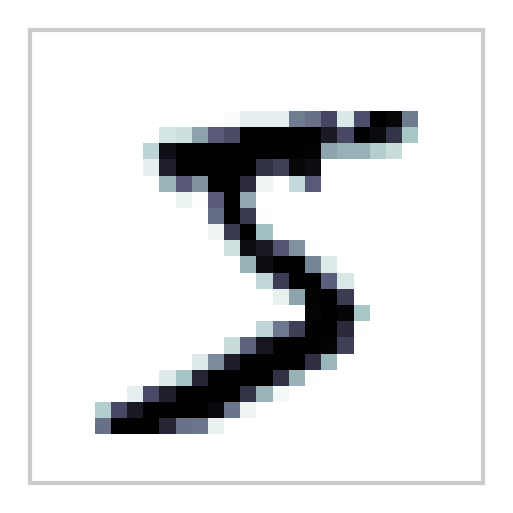

In [4]:
plt.figure(figsize=(2, 2))
plt.imshow(X_train0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

#### Inputs $\rightarrow$ Change to `float` & Scaling

In [5]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


#### Labels $\rightarrow$ One-Hot-Encoding

In [6]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [7]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

## 3.2. Create Model

<img src="https://datascienceschool.net/upfiles/90f2752671424cef846839b89ddcf6aa.png">

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential()
model.add(Dense(15, input_dim=784, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

#### Use `model to dot` & `summary` to check the model structure

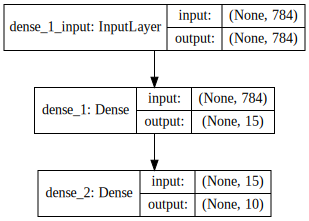

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [11]:
l1 = model.layers[0]
l2 = model.layers[1]

In [12]:
l1.name, type(l1), l1.output_shape, l1.activation.__name__, l1.count_params()

('dense_1', keras.layers.core.Dense, (None, 15), 'sigmoid', 11775)

In [13]:
l2.name, type(l1), l2.output_shape, l2.activation.__name__, l2.count_params()

('dense_2', keras.layers.core.Dense, (None, 10), 'sigmoid', 160)

## 3.3. `fit` Model

In [14]:
%%time
hist = model.fit(X_train, Y_train, 
                 epochs=30, batch_size=100, 
                 validation_data=(X_test, Y_test), 
                 verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 4s - loss: 0.1019 - acc: 0.2441 - val_loss: 0.0864 - val_acc: 0.3212
Epoch 2/30
 - 5s - loss: 0.0845 - acc: 0.3920 - val_loss: 0.0821 - val_acc: 0.4408
Epoch 3/30
 - 11s - loss: 0.0796 - acc: 0.4996 - val_loss: 0.0765 - val_acc: 0.5340
Epoch 4/30
 - 9s - loss: 0.0740 - acc: 0.5619 - val_loss: 0.0708 - val_acc: 0.5851
Epoch 5/30
 - 5s - loss: 0.0682 - acc: 0.6148 - val_loss: 0.0649 - val_acc: 0.6522
Epoch 6/30
 - 4s - loss: 0.0625 - acc: 0.6758 - val_loss: 0.0594 - val_acc: 0.6999
Epoch 7/30
 - 3s - loss: 0.0576 - acc: 0.7101 - val_loss: 0.0551 - val_acc: 0.7317
Epoch 8/30
 - 3s - loss: 0.0537 - acc: 0.7325 - val_loss: 0.0516 - val_acc: 0.7485
Epoch 9/30
 - 3s - loss: 0.0505 - acc: 0.7474 - val_loss: 0.0486 - val_acc: 0.7638
Epoch 10/30
 - 3s - loss: 0.0478 - acc: 0.7608 - val_loss: 0.0461 - val_acc: 0.7759
Epoch 11/30
 - 3s - loss: 0.0455 - acc: 0.7739 - val_loss: 0.0439 - val_acc: 0.7893
Epoch 12/30
 - 3s - loss: 0.0435 -

#### Visualize the change in `loss`

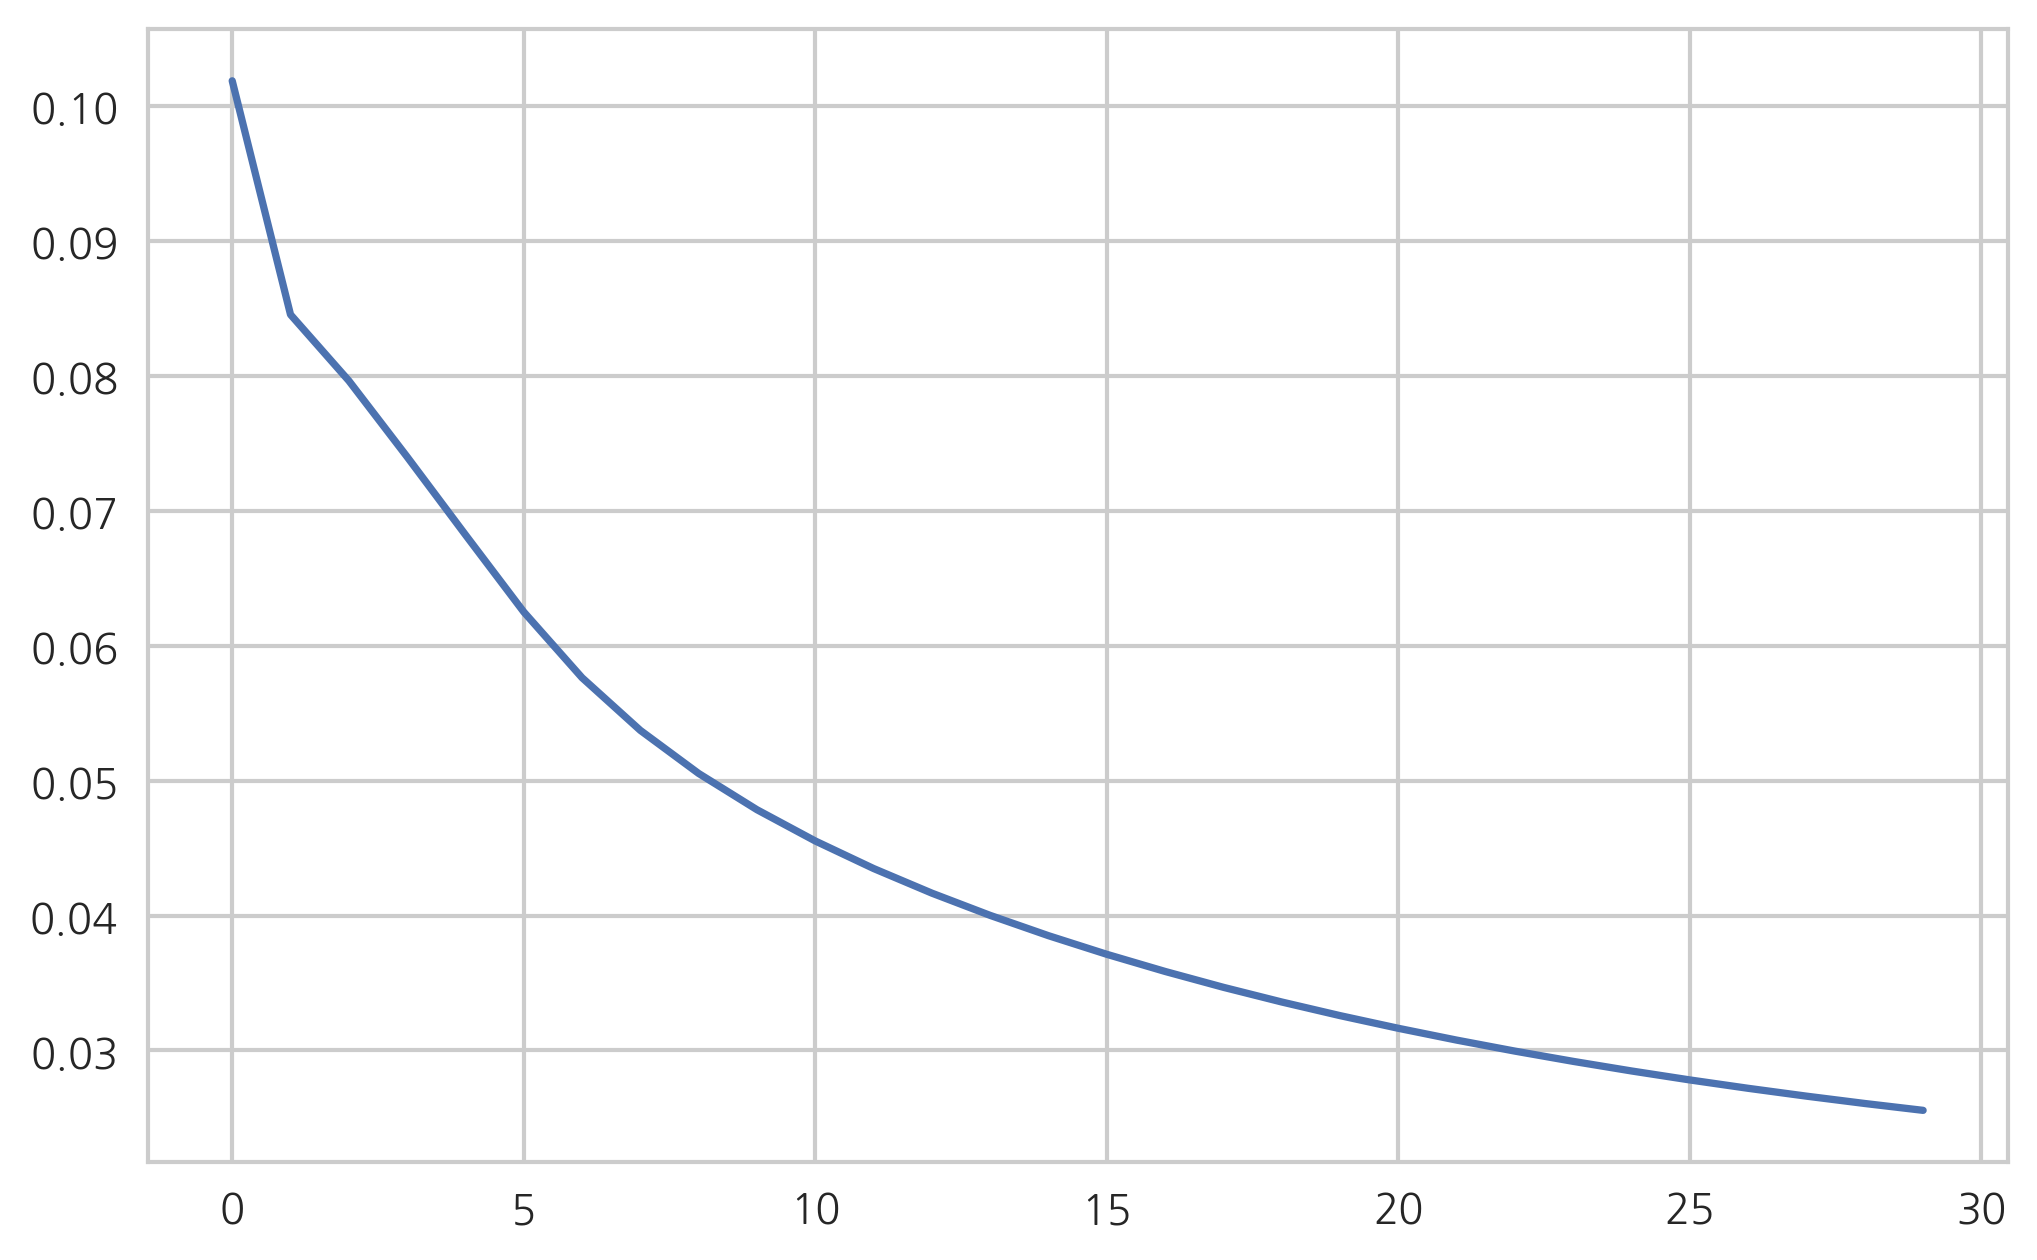

In [15]:
plt.plot(hist.history['loss'])
plt.show()

#### Visualize the ACC-curve

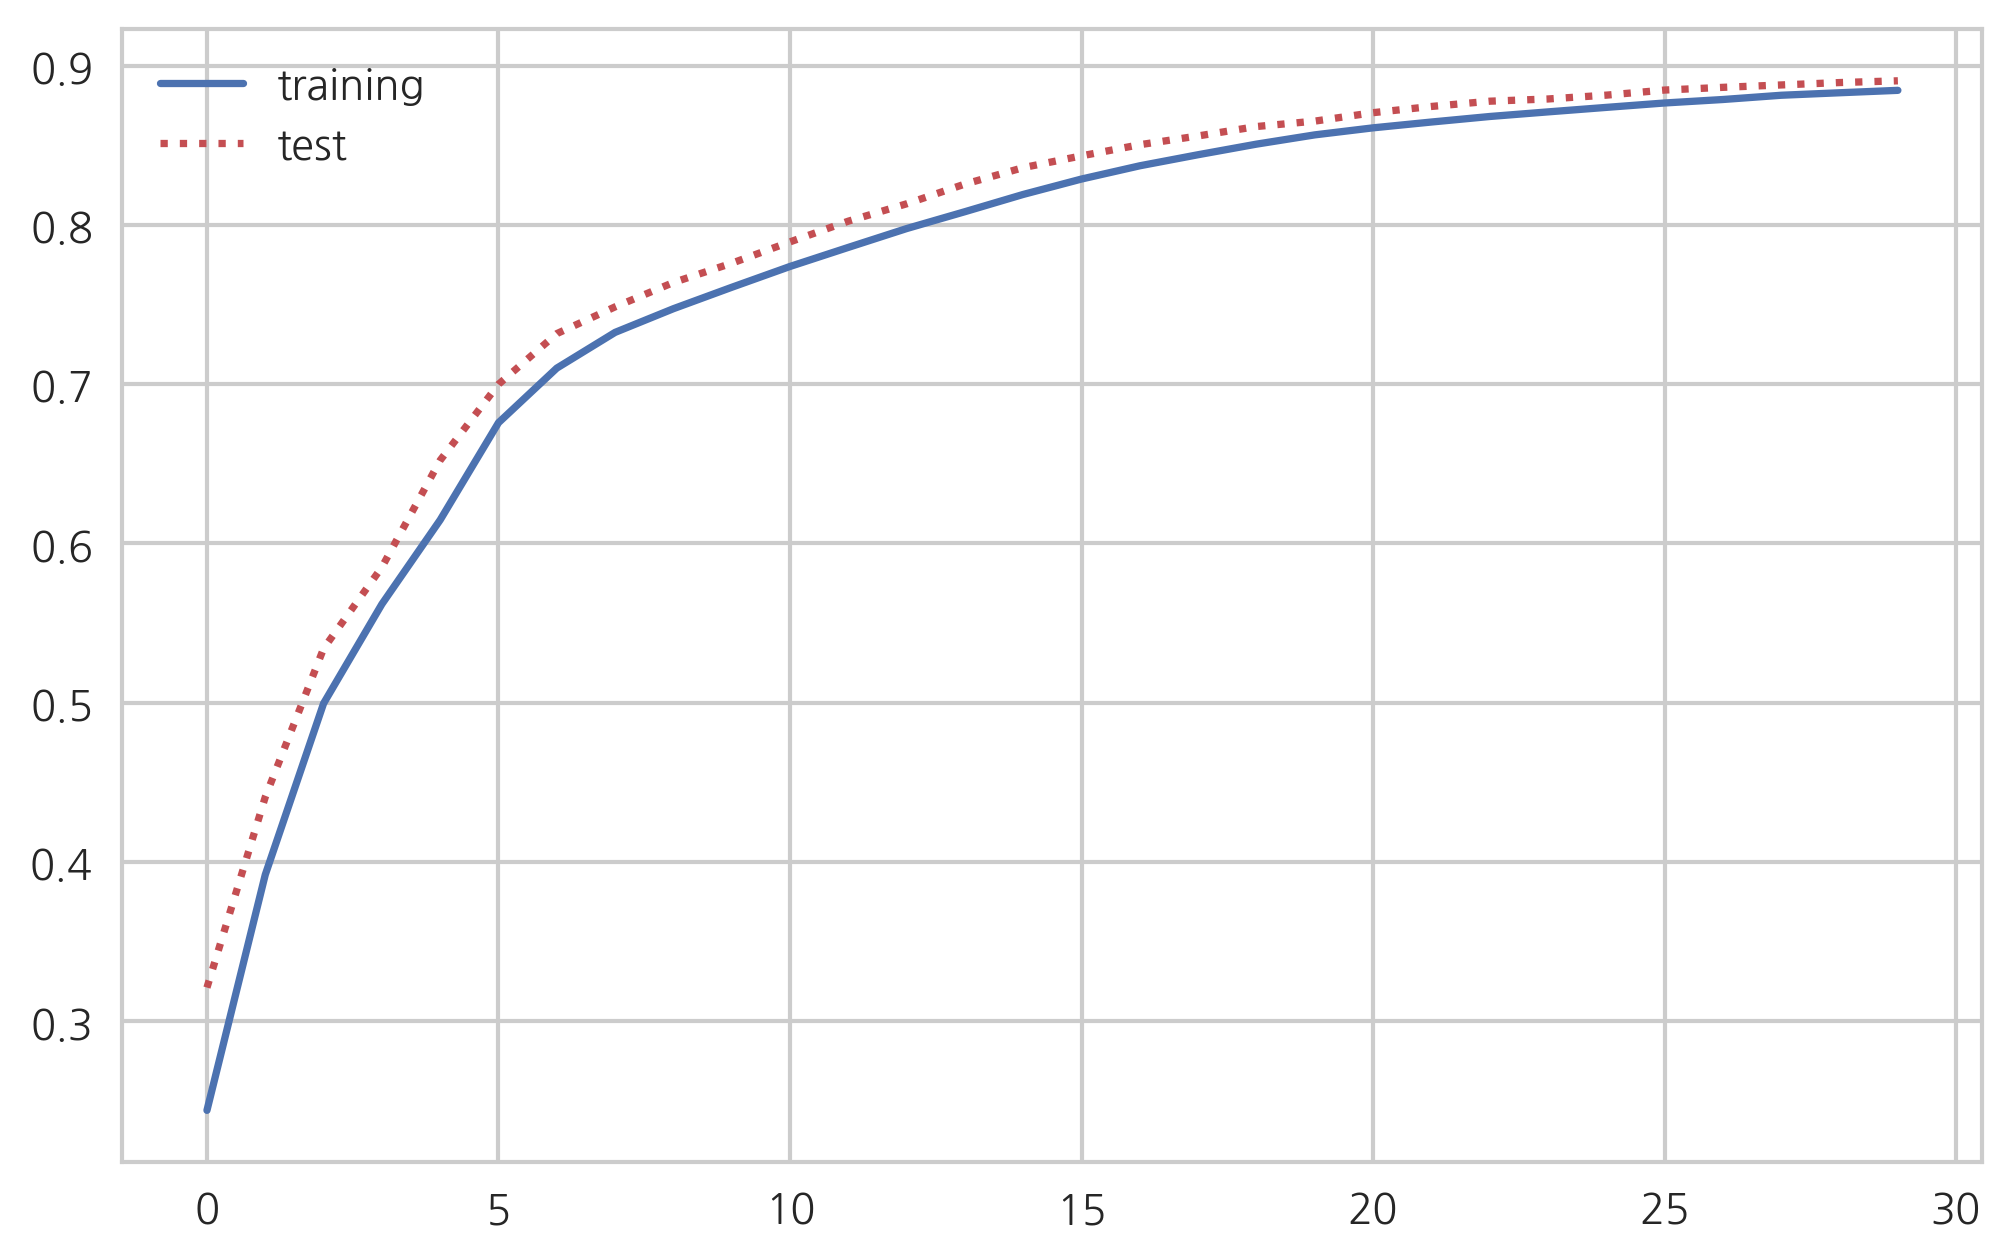

In [16]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

## 3.4. Use Model

#### Use `get_weights` method to extract $w$ and $b$

In [17]:
w1 = l1.get_weights()
w1[0].shape, w1[1].shape

((784, 15), (15,))

In [18]:
w2 = l2.get_weights()
w2[0].shape, w2[1].shape

((15, 10), (10,))

#### Use `predict` & `predict_classes` to make prediction

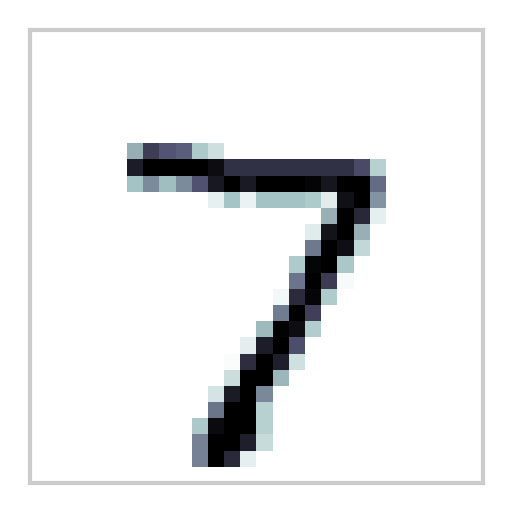

In [19]:
plt.figure(figsize=(2, 2))
plt.imshow(X_test0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [20]:
model.predict(X_test[:1, :])

array([[0.01765111, 0.01910305, 0.01319704, 0.02872547, 0.01252797,
        0.05718828, 0.01234368, 0.9418386 , 0.00762577, 0.05530227]],
      dtype=float32)

In [21]:
model.predict_classes(X_test[:1, :], verbose=0)

array([7])

## 3.5. Save Model

#### Use `save` method to save model as `hdf5` format

In [22]:
model.save('my_model.hdf5')
del model

#### Use `load_model` method to load model

In [23]:
from keras.models import load_model

model2 = load_model('my_model.hdf5')
model2.predict_classes(X_test[:1, :], verbose=0)

array([7])